# MOwNiT
## Laboratorium 2 - Analiza danych DataFrames

In [6]:
using LinearAlgebra
using DataFrames
using BenchmarkTools
using CSV
using Plots
using Statistics

# Zad1

In [7]:
function dot_product(vector_1, vector_2)
    return dot(vector_1, vector_2)
end

function multiply_sqr_matrix_by_vector(sqr_matrix, vector)
    return sqr_matrix * vector'
end

multiply_sqr_matrix_by_vector (generic function with 1 method)

# Zad2

In [37]:
dot_product_times = []
matrix_multiply_times = []

for i=100:100:10000
    vector = rand(Int32, (1,i))
    sqr_matrix = rand(Int32, (i,i))
    push!(dot_product_times, [])
    push!(matrix_multiply_times, [])
    for j=1:10
        push!(dot_product_times[i÷100], @timed dot_product(vector, vector))
        push!(matrix_multiply_times[i÷100], @timed multiply_sqr_matrix_by_vector(sqr_matrix, vector))
    end
end

In [70]:
df_times = DataFrame()
matrix_multiply_times[90][1]
df_times[:, :Rozmiar] = [i for i=100:100:10000 for j=1:10]
df_times[:, :DotProductTimes] = [dot_product_times[i][j].time for i=1:100 for j=1:10]
df_times[:, :MatrixMultiplicationTimes] = [matrix_multiply_times[i][j].time for i=1:100 for j=1:10]
show(df_times)

1000×3 DataFrame
  Row │ Rozmiar  DotProductTimes  MatrixMultiplicationTimes 
      │ Int64    Float64          Float64                   
──────┼─────────────────────────────────────────────────────
    1 │     100         3.01e-7                   1.9e-5
    2 │     100         2.0e-7                    1.12e-5
    3 │     100         1.0e-7                    1.1e-5
    4 │     100         1.0e-7                    1.11e-5
    5 │     100         1.0e-7                    1.1e-5
    6 │     100         1.0e-7                    1.12e-5
    7 │     100         9.9e-8                    1.25e-5
    8 │     100         1.0e-7                    1.1099e-5
    9 │     100         0.0                       1.11e-5
   10 │     100         1.0e-7                    1.1e-5
   11 │     200         2.0e-7                    4.4099e-5
  ⋮   │    ⋮            ⋮                     ⋮
  991 │   10000         6.599e-6                  0.362908
  992 │   10000         7.101e-6                  0.357

# Zad3 Save to file

In [71]:
CSV.write("TimeTests.csv", df_times)

"TimeTests.csv"

# Zad4 Read file to DataFrame

In [72]:
my_data_frame = CSV.read("TimeTests.csv", delim=",", DataFrame)

,Rozmiar,DotProductTimes,MatrixMultiplicationTimes
,Int64,Float64,Float64
1,100,3.01e-7,1.9e-5
2,100,2.0e-7,1.12e-5
3,100,1.0e-7,1.1e-5
4,100,1.0e-7,1.11e-5
5,100,1.0e-7,1.1e-5
6,100,1.0e-7,1.12e-5
7,100,9.9e-8,1.25e-5
8,100,1.0e-7,1.1099e-5
9,100,0.0,1.11e-5


In [73]:
my_data_frame_grouped_by_size = groupby(my_data_frame, :Rozmiar)

,Rozmiar,DotProductTimes,MatrixMultiplicationTimes
,Int64,Float64,Float64
1,100,3.01e-7,1.9e-5
2,100,2.0e-7,1.12e-5
3,100,1.0e-7,1.1e-5
4,100,1.0e-7,1.11e-5
5,100,1.0e-7,1.1e-5
6,100,1.0e-7,1.12e-5
7,100,9.9e-8,1.25e-5
8,100,1.0e-7,1.1099e-5
9,100,0.0,1.11e-5


# Zad5

In [74]:
df_mean_times = combine(my_data_frame_grouped_by_size, "DotProductTimes"=>mean, "MatrixMultiplicationTimes"=>mean,
 "DotProductTimes"=> std, "MatrixMultiplicationTimes"=>std)

,Rozmiar,DotProductTimes_mean,MatrixMultiplicationTimes_mean,DotProductTimes_std
,Int64,Float64,Float64,Float64
1,100,1.2e-7,1.20199e-5,7.91637e-8
2,200,1.4e-7,4.34792e-5,5.16398e-8
3,300,2.002e-7,9.85505e-5,6.32456e-10
4,400,2.403e-7,0.00018122,5.13832e-8
5,500,3.0e-7,0.00027766,4.69089e-8
6,600,4.006e-7,0.00055604,1.15663e-7
7,700,4.202e-7,0.00055325,6.35292e-8
8,800,4.902e-7,0.00073097,8.77152e-8
9,900,5.701e-7,0.00093931,2.21676e-7


# Zad6

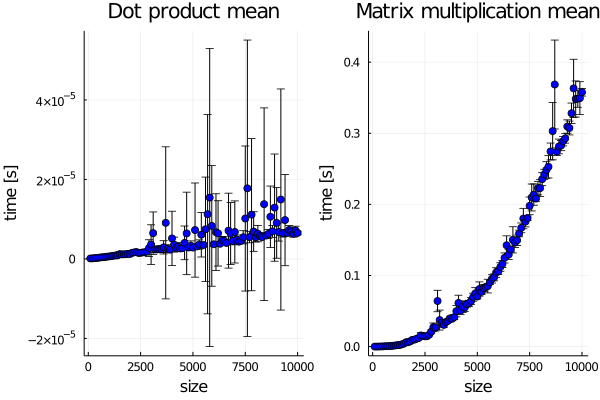

In [75]:
p1 = plot(df_mean_times.Rozmiar, df_mean_times.DotProductTimes_mean, colour = :blue,
        title="Dot product mean",label="",yerr=df_mean_times.DotProductTimes_std,
        seriestype=:scatter, layout = 1)

p2 = plot(df_mean_times.Rozmiar, df_mean_times.MatrixMultiplicationTimes_mean, colour = :blue,
        title="Matrix multiplication mean",label="",yerr=df_mean_times.MatrixMultiplicationTimes_std,seriestype=:scatter,
        layout = 1)

plot(p1, p2, ylabel = ["time [s]" "time [s]"],xlabel = ["size" "size"],layout = (1,2))

